# Introduction

But du projet : établir un algorithme de prévision de la hauteur d'eau et du débit d'un cours d'eau pour la pratique de l'aviron. Ce projet comprend 3 grandes parties : une partie qui vise à télécharger les bases de données utiles, une partie qui vise à étudier ses bases de données et à les analyser, et une partie qui vise à modéliser le problème pour tenter d'y apporter une réponse satisfiasante.

In [7]:
import pandas as pd
import requests
import geopandas as gpd
import os

# Debug

In [71]:
# hourly weather for Paris department
gz_file_path2 = "data/meteo-horaire-75-2023-2024.csv.gz"
df_meteo_hor_75 = pd.read_csv(gz_file_path2, compression='gzip', sep=';', encoding='utf-8')

In [72]:
df_meteo_hor_75.sample(10)

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJHH,RR1,QRR1,DRR1,QDRR1,...,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
64894,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,2024090712,0.0,1.0,15.0,9.0,...,20.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
32821,75107005,TOUR EIFFEL,48.858333,2.294500,330,2024110209,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39416,75110001,LARIBOISIERE,48.882833,2.352000,55,2023090802,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96821,75116008,LONGCHAMP,48.854833,2.233667,27,2024070712,0.0,1.0,NaN,NaN,...,7.0,9.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
90694,75116008,LONGCHAMP,48.854833,2.233667,27,2023102605,0.0,1.0,NaN,NaN,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
27639,75107005,TOUR EIFFEL,48.858333,2.294500,330,2024033111,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76650,75114007,PARIS-MONTSOURIS-DOUBLE,48.821667,2.337833,75,2024021404,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34000,75110001,LARIBOISIERE,48.882833,2.352000,55,2023012510,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15276,75106001,LUXEMBOURG,48.844667,2.333833,46,2024092812,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92261,75116008,LONGCHAMP,48.854833,2.233667,27,2023123012,0.0,1.0,NaN,NaN,...,0.0,9.0,4.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df_meteo_hor_75.columns

Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJHH', 'RR1',
       'QRR1', 'DRR1', 'QDRR1',
       ...
       'INS', 'QINS', 'INS2', 'QINS2', 'TLAGON', 'QTLAGON', 'TVEGETAUX',
       'QTVEGETAUX', 'ECOULEMENT', 'QECOULEMENT'],
      dtype='object', length=204)

In [74]:
columns_to_keep = ["NUM_POSTE", "NOM_USUEL", "LAT", "LON", "AAAAMMJJHH","RR1", "DRR1", "T", "U", "PSTAT"]
df_meteo_hor_75_cleaned = df_meteo_hor_75[columns_to_keep]

In [75]:
df_meteo_hor_75_cleaned

,NUM_POSTE,NOM_USUEL,LAT,LON,AAAAMMJJHH,RR1,DRR1,T,U,PSTAT
0,75106001,LUXEMBOURG,48.844667,2.333833,2023010100,0.0,NaN,15.4,NaN,NaN
1,75106001,LUXEMBOURG,48.844667,2.333833,2023010101,0.0,NaN,15.3,NaN,NaN
2,75106001,LUXEMBOURG,48.844667,2.333833,2023010102,0.0,NaN,15.0,NaN,NaN
3,75106001,LUXEMBOURG,48.844667,2.333833,2023010103,0.0,NaN,14.7,NaN,NaN
4,75106001,LUXEMBOURG,48.844667,2.333833,2023010104,0.0,NaN,14.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
100240,75116008,LONGCHAMP,48.854833,2.233667,2024112623,0.0,NaN,8.3,97.0,NaN
100241,75116008,LONGCHAMP,48.854833,2.233667,2024112700,0.0,NaN,9.7,95.0,NaN
100242,75116008,LONGCHAMP,48.854833,2.233667,2024112701,0.0,NaN,10.2,93.0,NaN
100243,75116008,LONGCHAMP,48.854833,2.233667,2024112702,0.0,NaN,10.3,94.0,NaN


In [76]:
df_meteo_hor_75_cleaned['NOM_USUEL'].unique()

array(['LUXEMBOURG', 'TOUR EIFFEL', 'LARIBOISIERE', 'PARIS-MONTSOURIS',
       'PARIS-MONTSOURIS-DOUBLE', 'LONGCHAMP'], dtype=object)

In [42]:
# hourly weather for Boulogne department
gz_file_path3 = "data/meteo-horaire-92-2023-2024.csv.gz"
df_meteo_hor_92 = pd.read_csv(gz_file_path3, compression='gzip', sep=';', encoding='utf-8')

In [ ]:
df_meteo_hor_92_cleaned = df_meteo_hor_92[columns_to_keep]

In [ ]:
df_meteo_hor_92_cleaned

In [54]:
df_meteo_hor_92_cleaned['NOM_USUEL'].unique()

array(['SURESNES'], dtype=object)

In [153]:
url = "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/HOR/H_92_latest-2023-2024.csv.gz"
df_meteo_hor_92_2 = pd.read_csv(url, compression='gzip', sep=';', encoding='utf-8')
df_meteo_hor_92_2

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJHH,RR1,QRR1,DRR1,QDRR1,...,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
0,92073001,SURESNES,48.870667,2.234667,30,2023010100,0.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92073001,SURESNES,48.870667,2.234667,30,2023010101,0.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92073001,SURESNES,48.870667,2.234667,30,2023010102,0.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,92073001,SURESNES,48.870667,2.234667,30,2023010103,0.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92073001,SURESNES,48.870667,2.234667,30,2023010104,0.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16751,92073001,SURESNES,48.870667,2.234667,30,2024112823,0.0,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16752,92073001,SURESNES,48.870667,2.234667,30,2024112900,0.0,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16753,92073001,SURESNES,48.870667,2.234667,30,2024112901,0.0,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16754,92073001,SURESNES,48.870667,2.234667,30,2024112902,0.0,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data loading

Dans cette partie, nous importons de data.gouv.fr :
- des bases de données météo horaire pour chaque département
- une base de données concernant la hauteur d'eau et le débit des cours d'eau
- une base de données permettant de tracer ces cours d'eau sur une carte
- une base de données permettant de localiser les clubs d'aviron

In [2]:
os.chdir("/home/onyxia/work/Projet-de-Python-Leroux-Gisserot")

In [3]:
from utils.data_loading import (
    read_csv_from_url, 
    load_department_data,
    load_and_save_all_department_data,
    load_data_from_disk,
)

In [5]:
load_and_save_all_department_data(
    department_ids=[f"{i:02d}" for i in range(1, 96)],
    save_dir="/home/onyxia/work/Projet-de-Python-Leroux-Gisserot/data/hourly-weather-23-24"
)

Loading data from internet and saving to disk: 100%|██████████| 49/49 [05:08<00:00,  6.30s/it]


In [48]:
df = load_data_from_disk(
    data_dir="/home/onyxia/work/Projet-de-Python-Leroux-Gisserot/data/hourly-weather-23-24"
)

Loading and concatenating data from disk: 100%|██████████| 95/95 [00:18<00:00,  5.19it/s]


In [50]:
df.sort_values(by=["DEPARTMENT_ID", "NOM_USUEL", "AAAAMMJJHH"], inplace=True) # sorting values

In [72]:
# Renaming columns
df = df.rename(columns={"AAAAMMJJHH": "DATE & HEURE", "RR1": "PRECIPIT",
                        "DRR1": "DUREE_PRECIPIT", "T": "TEMP", "U": "TAUX_HUMID", 
                        "PSTAT": "PRESSION_STAT"})

# Formatting dates to make them usable in graphs
df["DATE & HEURE"] = pd.to_datetime(df["DATE & HEURE"], format="%Y%m%d%H")

# Displaying dataframe
df

,DEPARTMENT_ID,NUM_POSTE,NOM_USUEL,LAT,LON,DATE & HEURE,PRECIPIT,DUREE_PRECIPIT,TEMP,TAUX_HUMID,PRESSION_STAT
107384,1,1089001,AMBERIEU,45.976500,5.329333,2023-01-01 00:00:00,0.0,0.0,12.8,76.0,994.8
107385,1,1089001,AMBERIEU,45.976500,5.329333,2023-01-01 01:00:00,0.0,0.0,13.3,72.0,994.7
107386,1,1089001,AMBERIEU,45.976500,5.329333,2023-01-01 02:00:00,0.0,0.0,13.0,71.0,995.0
107387,1,1089001,AMBERIEU,45.976500,5.329333,2023-01-01 03:00:00,0.0,0.0,13.4,68.0,995.1
107388,1,1089001,AMBERIEU,45.976500,5.329333,2023-01-01 04:00:00,0.0,0.0,13.2,69.0,995.3
...,...,...,...,...,...,...,...,...,...,...,...
100531,95,95690001,WY-DIT,49.108167,1.830667,2024-11-28 23:00:00,0.0,NaN,0.1,93.0,NaN
100532,95,95690001,WY-DIT,49.108167,1.830667,2024-11-29 00:00:00,0.0,NaN,0.5,95.0,NaN
100533,95,95690001,WY-DIT,49.108167,1.830667,2024-11-29 01:00:00,0.0,NaN,0.1,95.0,NaN
100534,95,95690001,WY-DIT,49.108167,1.830667,2024-11-29 02:00:00,0.0,NaN,-0.2,96.0,NaN


In [27]:
# Geojson file's URL
geojson_url = "https://www.data.gouv.fr/fr/datasets/r/f354a037-4a4e-4e7e-804b-01278ab228c5"

# Downloading the file locally
geojson_file = "rivers.geojson"
response = requests.get(geojson_url)
if response.status_code == 200:
    with open(geojson_file, "wb") as file:
        file.write(response.content)
else:
    raise Exception("Impossible de télécharger le fichier GeoJSON")

# Load geojson data with geopandas and remove unvalid geometries
rivers = gpd.read_file(geojson_file)
rivers = rivers[rivers.geometry.notnull()]

# Data analysis

1. Représentation graphique des fleuves, des stations météo et des clubs d'aviron

In [38]:
weather_stations = df[["NOM_USUEL", "LAT", "LON"]].drop_duplicates()

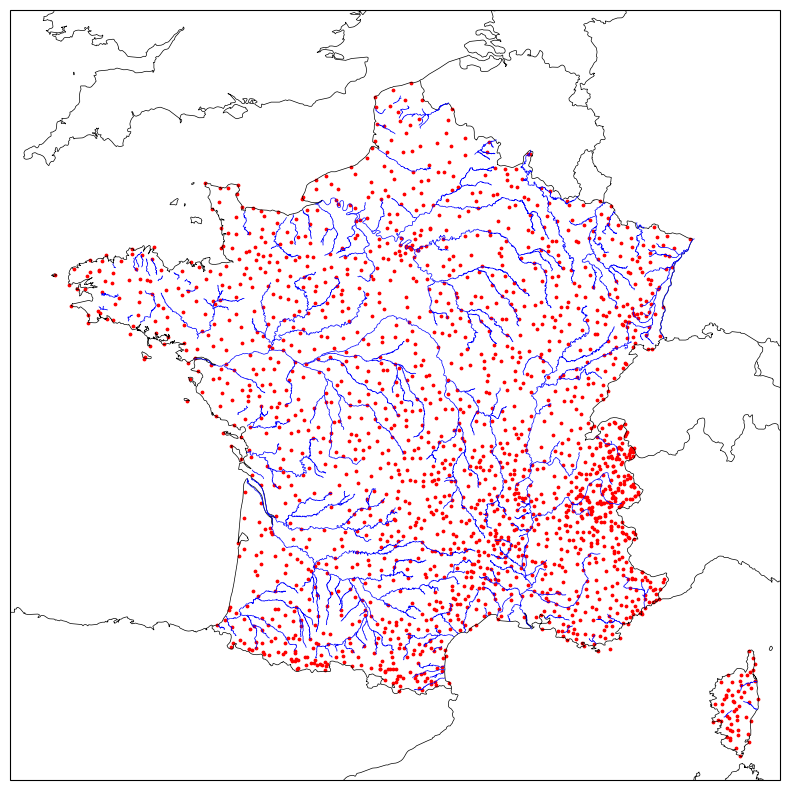

In [40]:
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
from cartopy.io import DownloadWarning

# Create map with cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.Mercator()})
ax.set_extent([-6, 10, 41, 52], crs=ccrs.PlateCarree())

# Adding features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='white', linewidth=0.5)
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Adding rivers (blue), weather stations (red) and rowing clubs (green)
ax.add_geometries(rivers.geometry, crs=ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linewidth=0.5)
ax.scatter(
    weather_stations['LON'], weather_stations['LAT'], 
    color='red', marker='o', s=3, 
    transform=ccrs.PlateCarree(), label="Stations"
)


plt.show()

warnings.simplefilter("ignore", DownloadWarning)

In [55]:
# Filtrer le DataFrame pour cette station
random_station = df["NOM_USUEL"].sample(n=1).iloc[0]
df_random_station = df[df["NOM_USUEL"] == random_station]
df_random_station

,DEPARTMENT_ID,NUM_POSTE,NOM_USUEL,LAT,LON,DATE & HEURE,PRECIPIT,DUREE_PRECIPIT,TEMP,TAUX_HUMID,PRESSION_STAT
67024,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,2023-01-01 00:00:00,0.0,0.0,13.7,88.0,1013.6
67025,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,2023-01-01 01:00:00,0.0,10.0,12.7,93.0,1014.2
67026,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,2023-01-01 02:00:00,0.2,53.0,12.2,96.0,1014.1
67027,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,2023-01-01 03:00:00,0.4,53.0,12.2,95.0,1014.9
67028,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,2023-01-01 04:00:00,0.4,60.0,12.0,93.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...
83754,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,2024-11-28 02:00:00,1.2,NaN,12.1,NaN,NaN
83755,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,2024-11-28 03:00:00,0.5,NaN,11.8,NaN,NaN
83756,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,2024-11-28 04:00:00,0.0,NaN,11.8,NaN,NaN
83757,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,2024-11-28 05:00:00,0.1,NaN,11.5,NaN,NaN


In [62]:
numeric_columns = ["PRECIPIT", "DUREE_PRECIPIT", "TEMP", "TAUX_HUMID", "PRESSION_STAT"]
describe = round(df_random_station[numeric_columns].describe(), 1)
describe

,PRECIPIT,DUREE_PRECIPIT,TEMP,TAUX_HUMID,PRESSION_STAT
count,16735.0,16514.0,16734.0,16729.0,16720.0
mean,0.1,4.3,13.8,82.1,1015.9
std,0.6,13.0,5.7,14.3,10.1
min,0.0,0.0,-4.9,22.0,969.8
25%,0.0,0.0,10.3,73.0,1011.1
50%,0.0,0.0,13.5,85.0,1016.6
75%,0.0,0.0,17.7,94.0,1021.7
max,23.7,60.0,34.4,100.0,1043.6


2. Graphe des précipitations en fonction du temps

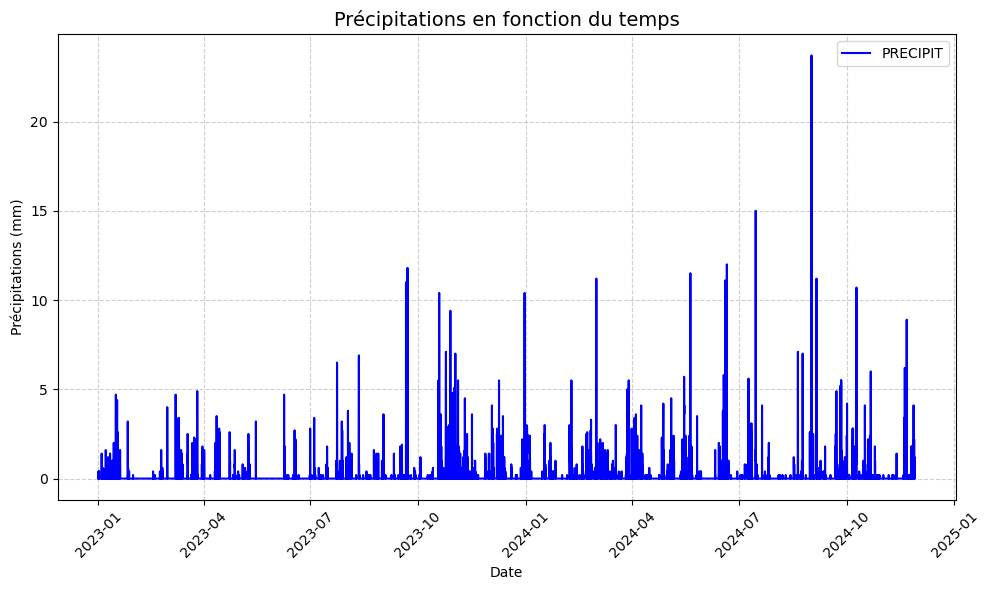

In [56]:
# Plotting precipitations over time
plt.figure(figsize=(10, 6))
plt.plot(df_random_station["DATE & HEURE"], df_random_station["PRECIPIT"], linestyle="-", color="blue", label="PRECIPIT")

# Graph customization
plt.title("Précipitations en fonction du temps 1", fontsize=14)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Précipitations (mm)", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.xticks(rotation=45)  # Rotation des dates sur l'axe X pour plus de lisibilité
plt.tight_layout()  # Ajuste les marges pour éviter que les textes soient coupés
plt.show()

In [94]:
import numpy as np
df_random_station['GROUP'] = np.arange(len(df_random_station)) // (7*24)

In [95]:
df_random_station

,DEPARTMENT_ID,NUM_POSTE,NOM_USUEL,LAT,LON,PRECIPIT,DUREE_PRECIPIT,TEMP,TAUX_HUMID,PRESSION_STAT,GROUP
0,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,0.0,0.0,13.7,88.0,1013.6,0
1,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,0.0,10.0,12.7,93.0,1014.2,0
2,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,0.2,53.0,12.2,96.0,1014.1,0
3,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,0.4,53.0,12.2,95.0,1014.9,0
4,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,0.4,60.0,12.0,93.0,1015.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16730,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,1.2,NaN,12.1,NaN,NaN,99
16731,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,0.5,NaN,11.8,NaN,NaN,99
16732,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,0.0,NaN,11.8,NaN,NaN,99
16733,44,44103001,ST NAZAIRE-MONTOIR,47.313833,-2.1545,0.1,NaN,11.5,NaN,NaN,99


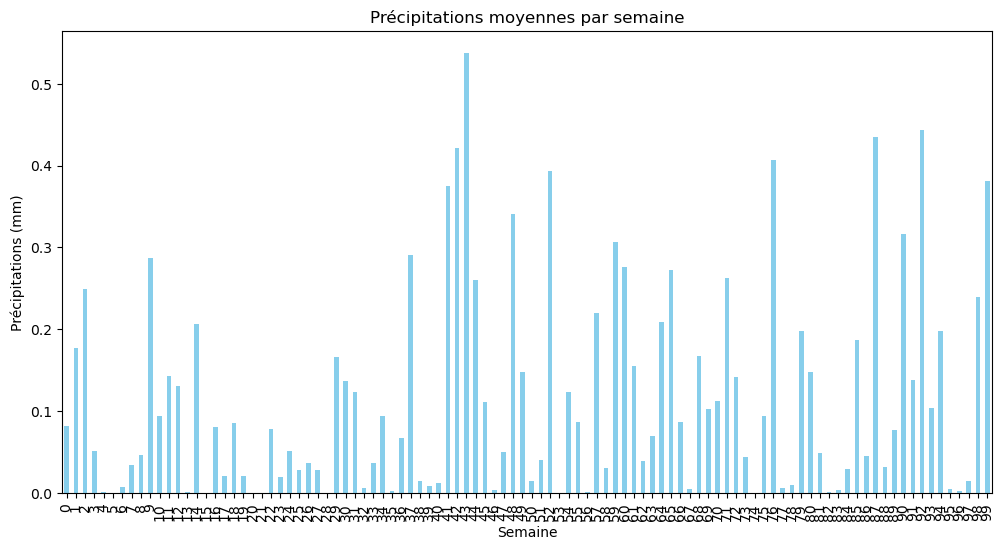

In [96]:
# Assurez-vous que la colonne 'GROUP' existe
# Moyenne des précipitations par groupe (chaque groupe représentant une semaine)
weekly_precipitation = df_random_station.groupby('GROUP')['PRECIPIT'].mean()

# Tracer le graphique
plt.figure(figsize=(12, 6))
weekly_precipitation.plot(kind='bar', color='skyblue')
plt.title('Précipitations moyennes par semaine')
plt.xlabel('Semaine')
plt.ylabel('Précipitations (mm)')
plt.show()

# Data modeling